In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from supermarket_categories import SupermarketCategories

df = pd.read_csv('datamarket_productos_de_supermercados.csv')
sc = SupermarketCategories(df, 
                           load_split_categories=False, 
                           simplify_data=True)
display(sc.dataset)
display(sc.dataset.info())

,insert_date,product_id,supermarket,price,reference_price,reference_unit,main_category,secondary_category,type,supercategories
0,2021-03-31,000524d73b9d09ae193aaf463191b038,carrefour-es,2.60,15.29,kg,charcuteria,fiambre_de_pavo_y_pollo,fiambre_de_pavo_y_pollo,carne
1,2021-03-31,000780b12d67871681dccc1383869831,carrefour-es,2.75,10.00,kg,la_despensa,dulce_y_desayuno,dulces_y_golosinas,conservas
2,2021-03-31,000980fa0323353bf82a87c4edbece89,dia-es,1.55,2.04,kg,congelados_y_helados,helados,zumos_horchatas_y_granizados,congelados
3,2021-03-31,000d481c0e60b87db07bd8e395e505de,dia-es,1.39,3.16,kg,alimentacion,legumbres,legumbres_preparadas,alimentacion_otros
4,2021-03-31,0010432366ece6221db98d6f1dc15d0b,mercadona-es,1.50,0.15,ud,limpieza_y_hogar,menaje_y_conservacion_de_alimentos,menaje_y_conservacion_de_alimentos,drogueria
...,...,...,...,...,...,...,...,...,...,...
299630,2022-06-30,ffdf78a9448041173eb593f95d0af392,carrefour-es,0.76,3.04,kg,productos_frescos,panaderia_bolleria_y_pasteleria,pan_de_molde_tostado_y_picos,frescos
299631,2022-06-30,fff2489d5b4ff800027ee527b8e6dea3,dia-es,1.59,8.59,kg,despensa,desayunos_y_dulces,galletas,conservas
299632,2022-06-30,fff3bcc496c06619a23befd1cd9003c9,dia-es,4.95,0.33,ud,bebe_cuidado_del_bebe,,,bebe
299633,2022-06-30,fff473551393a45da35c7ea160c52ada,mercadona-es,1.30,1.30,kg,postres_y_yogures,yogures,liquidos,lacteos_y_huevos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299635 entries, 0 to 299634
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   insert_date         299635 non-null  datetime64[ns]
 1   product_id          299635 non-null  object        
 2   supermarket         299635 non-null  object        
 3   price               299635 non-null  float64       
 4   reference_price     299635 non-null  float64       
 5   reference_unit      299332 non-null  object        
 6   main_category       299635 non-null  object        
 7   secondary_category  299635 non-null  object        
 8   type                299635 non-null  object        
 9   supercategories     254668 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 22.9+ MB


None

In [4]:
sc.dataset.to_csv('datamarket.csv', index=False)

,product_id
supermarket,
carrefour-es,14257
dia-es,10040
mercadona-es,8452


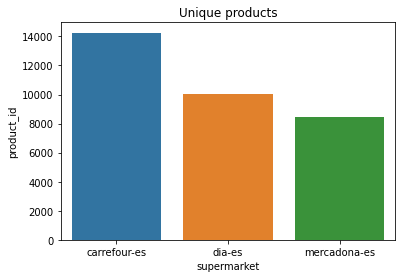

In [5]:
df = sc.dataset[['supermarket', 'product_id']].groupby(['supermarket']).nunique()
display(df)
sns.barplot(x=df.index, y="product_id", data=df).set(title='Unique products')
plt.show()

In [6]:
df_last = sc.dataset.groupby(['product_id', 'supermarket', 'main_category', 'secondary_category', 'type']).last('insert_date').reset_index()

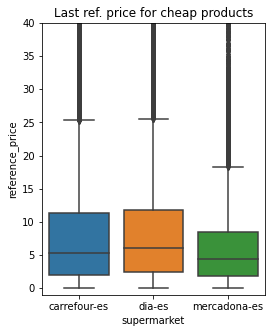

In [7]:
plt.figure(figsize=(4, 5))
sns.boxplot(x="supermarket", y="reference_price", data=df_last[df_last.reference_price<=40]).set(title='Last ref. price for cheap products')
plt.ylim(-1, 40)
plt.show()

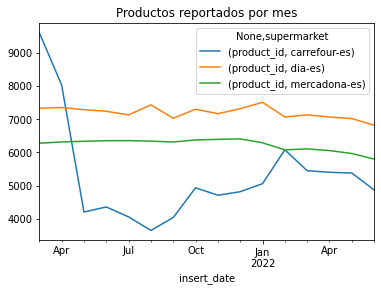

In [12]:
x = sc.dataset[['insert_date', 'supermarket','product_id']].groupby([pd.Grouper(key="insert_date", freq="M"), 'supermarket']).nunique()

x.unstack().plot()
plt.title('Productos reportados por mes')
plt.show()

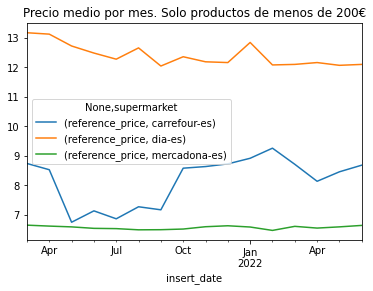

In [35]:
x = sc.dataset.loc[sc.dataset.reference_price<200, ['insert_date', 'supermarket', 'reference_price']].groupby([pd.Grouper(key="insert_date", freq="M"), 'supermarket']).mean('reference_price')

x.unstack().plot()
plt.title('Precio medio por mes. Solo productos de menos de 200€')
plt.show()